In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib import style

# Part 1: Datos

In [2]:
# Load data
iris = load_iris()
X = iris.data
Y = iris.target

print("Data shape:", X.shape)
print("Examples:\n", X[:10])
print("\nLabels shape", Y.shape)
print("Examples:\n", Y)
print("Class names:", iris.target_names)

Data shape: (150, 4)
Examples:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]

Labels shape (150,)
Examples:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Class names: ['setosa' 'versicolor' 'virginica']


In [3]:
# Print more info
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

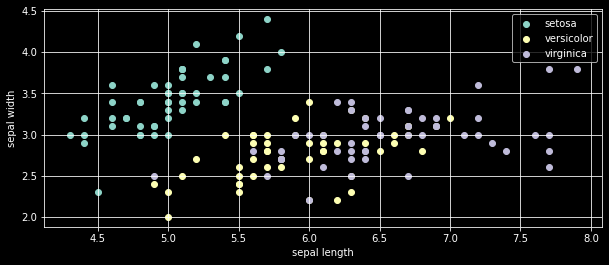

In [4]:
# Plot two features: petal length and petal width
style.use('dark_background')
plt.figure(figsize=(10, 4))
plt.scatter(X[Y==0, 0], X[Y==0, 1], label=iris.target_names[0])
plt.scatter(X[Y==1, 0], X[Y==1, 1], label=iris.target_names[1])
plt.scatter(X[Y==2, 0], X[Y==2, 1], label=iris.target_names[2])
plt.legend()
plt.grid(True)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

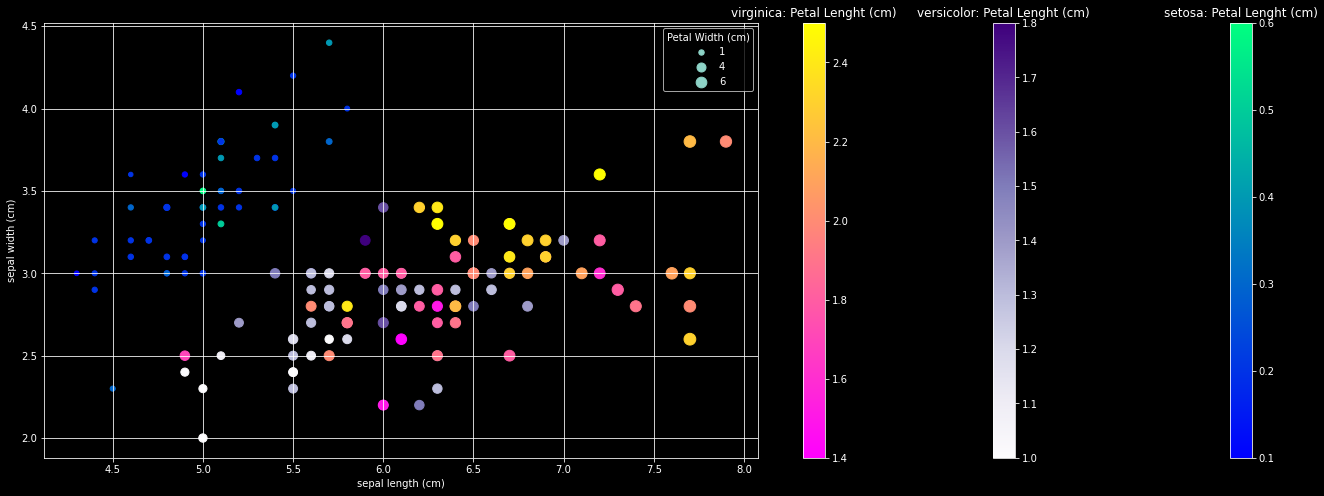

In [5]:
# == Q1: ==
# Idea alguna manera de visualizar y diferenciar las 4 variables al mismo tiempo,
# usando una sola gráfica 2D. Muestra tu solución:

# Plot two features: petal length and petal width
style.use('dark_background')
plt.figure(figsize=(25, 8))
plt.scatter(X[Y==0, 0], X[Y==0, 1], label=round(np.mean(X[Y==0,2])), s=X[Y==0,2]*20, c=X[Y==0,3], cmap="winter")
cbar1=plt.colorbar()
cbar1.ax.set_title(iris.target_names[0].__add__(': Petal Lenght (cm)'))
plt.scatter(X[Y==1, 0], X[Y==1, 1], label=round(np.mean(X[Y==1,2])), s=X[Y==1,2]*20, c=X[Y==1,3], cmap="Purples")
cbar2=plt.colorbar()
cbar2.ax.set_title(iris.target_names[1].__add__(': Petal Lenght (cm)'))
plt.scatter(X[Y==2, 0], X[Y==2, 1], label=round(np.mean(X[Y==2,2])), s=X[Y==2,2]*20, c=X[Y==2,3], cmap="spring")
cbar3=plt.colorbar()
cbar3.ax.set_title(iris.target_names[2].__add__(': Petal Lenght (cm)'))
plt.legend(title="Petal Width (cm)")
plt.grid(True)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()

In [6]:
# Let's keep two classes only, and two variables
X = X[:100, :2]
Y = Y[:100]

print("Data:", X.shape)
print(X[:10])
print("Labels", Y.shape)
print(Y)

Data: (100, 2)
[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]
 [5.4 3.9]
 [4.6 3.4]
 [5.  3.4]
 [4.4 2.9]
 [4.9 3.1]]
Labels (100,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [7]:
# Split data into training + validation and test sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(80, 2)
(20, 2)
(80,)
(20,)


# Part 2: Perceptron

In [8]:
# Define class linear (step) perceptron
class LPerceptron:
  #constructor
  def __init__ (self):
    self.w = None
    self.b = None
  
  #activation function  
  def activation(self, x):
    return 1 if (np.dot(self.w, x) >= self.b) else 0
  
  #predict on data
  def predict(self, X):
    Y = []
    for x in X:
      result = self.activation(x)
      Y.append(result)
    return np.array(Y)

  #train
  def fit(self, X, Y, n_epochs=1, lr=1, val_split=0.1, verbose=False):
    x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=val_split) #split train into train and val
    
    self.w = np.random.rand(X.shape[1])
    self.b = 0.0
    
    accuracy = np.zeros((2,))
    accuracy[0] = accuracy_score(y_train, self.predict(x_train))
    accuracy[1] = accuracy_score(y_val, self.predict(x_val))
    if verbose:
      print(f"Epoch: {0:3d} -- acc: {accuracy[0]:6.4f}, acc_val: {accuracy[1]:6.4f}")
    
    accuracy = np.zeros((n_epochs, 2))
    for epoch in range(n_epochs): #loop through epochs
      for x, y in zip(x_train, y_train):  #loop through samples
        y_hat = self.activation(x)
        err = y - y_hat
        self.w = self.w + lr * err * x  #LA
        self.b = self.b + lr * err      #LB
      accuracy[epoch, 0] = accuracy_score(y_train, self.predict(x_train))
      accuracy[epoch, 1] = accuracy_score(y_val, self.predict(x_val))
      if verbose:
        print(f"Epoch: {epoch+1:3d} -- acc: {accuracy[epoch, 0]:6.4f}, acc_val: {accuracy[epoch, 1]:6.4f}")
        
    return accuracy

== Q2: ==
Explica qué sucede en las líneas comentadas como #LA y #LB, ¿Qué significa cada término de las ecuaciones?:

Nuestro modelo de Deep Learning calcula 2 cosas: w y b. Eso es lo que se está encontrando en las líneas LA y LB a través del descenso de gradiente. En clase vimos: w_i=w_i-lr*(parE/parw_i)=w_i+2*mu*(err)*x_i

w es una transformación lineal cuyas entradas son los pesos que se le tienen que asignar a cada entrada del tensor x para que wTx + b aproxime a y. 

b es el sesgo (bias) del problema, este termino sirve para el caso en el que nuestro tensor x es igual a cero, pero la y resultante para ese tensor es distinta de 0. En el ML Glossary de las referencias del curso se pone como ejemplo una compañia de ventas que está decidiendo cuántos anuncios poner en una página y para ello produce un modelo que le dirá las ventas (y) que producirá el número de anuncios (x). Si x fuera 0 es muy improbable que las ventas también fueran 0 por clientes anteriores o anuncios que ya se habían colocado. El término b sirve para que si wTx=0 entonces 'y' sea distinto de 0, ya que quedaría y=b. Sin embargo, de antemano no conocemos el valor del sesgo por lo que el modelo tendrá que encontrarlo.

err es el término que nos dice qué tan lejos estuvo nuestra aproximación (y') del valor real que deberíamos de alcanzar (y). Este término nos va a indicar la dirección en la que debe de cambiar w_i para que nuestro modelo se acerque más a y. 

lr es el hiperparámetro con el que decidimos qué tanto queremos que afecte el error a nuestro cálculo de w y b. Si err*x nos da la dirección en la que debemos avanzar el modelo, lr nos dirá qué tanto avanzaremos en dicha dirección.   

¿Por qué las expresiones contienen el término "err"?
Es la derivada de nuestra función de costo E=(y-y')^2. Este término nos va a indicar la dirección en la que debe de cambiar w_i para que nuestro modelo se acerque más a y. En otras palabras, el término "err" es necesario para que el modelo "descienda en el gradiente" en una buena dirección.

¿Por qué la expresión en #LA contiene la variable de entrada "x"?
Porque al hacer la derivada parcial de E con respecto a w_n el único término que no se vuelve 0 en la suma w1*x1+...+wn*xn es xn. Por la forma en la que está definido el operador * sobre arreglos en python esa operación realmente está multiplicando cada entrada del vector err por su respectiva entrada del vector x. Eso resulta en que podamos definir al vector w de un jalón en lugar de definir cada entrada con la fórmula w_n=w_n+lr*err*x_n. Aunque en realidad esa es la operación que está sucediendo en cada entrada del vector w. 

¿Cuántas iteraciones suceden en el loop interno del método fit?
n_epoch veces el primer for y el número de datos de entrenamiento que le quieras poner en el segundo for. En este caso n_epoch=1 y hay 90 tuplas de datos de entrenamiento.  

In [9]:
# Create a model and train it for 50 epochs
perceptron = LPerceptron()
acc_history = perceptron.fit(x_train, y_train, n_epochs=50, lr=0.5, val_split=0.1, verbose=True)
# Encuentra el mejor learning rate lr

Epoch:   0 -- acc: 0.5556, acc_val: 0.3750
Epoch:   1 -- acc: 0.9028, acc_val: 0.8750
Epoch:   2 -- acc: 0.9722, acc_val: 1.0000
Epoch:   3 -- acc: 0.6111, acc_val: 0.6250
Epoch:   4 -- acc: 0.5000, acc_val: 0.6250
Epoch:   5 -- acc: 0.5000, acc_val: 0.6250
Epoch:   6 -- acc: 0.9167, acc_val: 0.8750
Epoch:   7 -- acc: 0.5833, acc_val: 0.6250
Epoch:   8 -- acc: 0.5694, acc_val: 0.6250
Epoch:   9 -- acc: 0.9167, acc_val: 0.8750
Epoch:  10 -- acc: 0.7917, acc_val: 0.7500
Epoch:  11 -- acc: 0.6528, acc_val: 0.6250
Epoch:  12 -- acc: 0.9028, acc_val: 0.8750
Epoch:  13 -- acc: 0.8056, acc_val: 0.7500
Epoch:  14 -- acc: 0.9861, acc_val: 1.0000
Epoch:  15 -- acc: 0.9028, acc_val: 0.8750
Epoch:  16 -- acc: 0.8333, acc_val: 0.7500
Epoch:  17 -- acc: 0.9861, acc_val: 1.0000
Epoch:  18 -- acc: 0.8750, acc_val: 0.8750
Epoch:  19 -- acc: 0.8194, acc_val: 0.7500
Epoch:  20 -- acc: 0.9306, acc_val: 0.8750
Epoch:  21 -- acc: 0.8750, acc_val: 0.8750
Epoch:  22 -- acc: 0.9722, acc_val: 1.0000
Epoch:  23 

In [10]:
# Making predictions on test data
y_test_hat = perceptron.predict(x_test)
print("Test acc:", accuracy_score(y_test_hat, y_test))

Test acc: 0.75


In [11]:
# Show the final values for the weights and bias
print("Weights:", perceptron.w)
print("bias:", perceptron.b)

Weights: [ 15.64252941 -35.27414706]
bias: -13.0


In [13]:
# == Q3: ==
# Corre el experimento anterior 100 veces (quizás quieras establecer verbose=False),
# y reporta el promedio +- desviación estándar obtenidos en la última época de cada corrida.
# Debes reportar 3 promedios: para training, validation, y test sets
# ¿Notas algún cambio significativo?
ACC = np.zeros((100, 3))
for ind in range(100):
  perceptron = LPerceptron()
  acc_history = perceptron.fit(x_train, y_train, n_epochs=100, lr=0.1, val_split=0.1, verbose=False) # Completar aquí
  ACC[ind, 0], ACC[ind, 1] = acc_history[-1]
  y_test_hat = perceptron.predict(x_test)
  ACC[ind, 2] = accuracy_score(y_test_hat, y_test)
    
print(f"Training:\t {ACC[:, 0].mean():6.4f} +- {ACC[:, 0].std():6.4f}")
print(f"Validation:\t {ACC[:, 1].mean():6.4f} +- {ACC[:, 1].std():6.4f}")
print(f"Test:\t\t {ACC[:, 2].mean():6.4f} +- {ACC[:, 2].std():6.4f}")

Training:	 0.9632 +- 0.0346
Validation:	 0.9413 +- 0.0819
Test:		 0.9540 +- 0.0783


In [14]:
# == Q4: ==
# Repite el experimento anterior pero ahora usando las 4 variables de los datos (en vez de sólo 2)
# ¿Hubo algún cambio significativo en los resultados obtenidos?
# ¿Por qué crees que fue esto?

# Load data
iris = load_iris()
X = iris.data
Y = iris.target

X = X[:100, :4]
Y = Y[:100]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1)

ACC = np.zeros((100, 3))
for ind in range(100):
  perceptron = LPerceptron()
  acc_history = perceptron.fit(x_train, y_train, n_epochs=100, lr=0.5, val_split=0.1, verbose=False) # Completar aquí
  ACC[ind, 0], ACC[ind, 1] = acc_history[-1]
  y_test_hat = perceptron.predict(x_test)
  ACC[ind, 2] = accuracy_score(y_test_hat, y_test)
    
print(f"Training:\t {ACC[:, 0].mean():6.4f} +- {ACC[:, 0].std():6.4f}")
print(f"Validation:\t {ACC[:, 1].mean():6.4f} +- {ACC[:, 1].std():6.4f}")
print(f"Test:\t\t {ACC[:, 2].mean():6.4f} +- {ACC[:, 2].std():6.4f}")

Training:	 1.0000 +- 0.0000
Validation:	 0.9989 +- 0.0111
Test:		 1.0000 +- 0.0000


In [33]:
# == Q5: ==
# Repite el experimento anterior pero ahora usando las 4 variables de las clases
# versicolor (1) y virginica (2).
# ¿Hubo algún cambio significativo en los resultados obtenidos?
# ¿Por qué crees que fue esto?
# ¿Por qué si modificamos los datos, seguimos usando las mismas etiquetas: Y = iris.target[:100]?

# Load data
iris = load_iris()
X = iris.data
Y = iris.target

X = np.concatenate((X[Y==1, :4], X[Y==2, :4]))
Y = Y[:100]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1)

ACC = np.zeros((100, 3))
for ind in range(100):
  perceptron = LPerceptron()
  acc_history = perceptron.fit(x_train, y_train, n_epochs=100, lr=0.5, val_split=0.1, verbose=False) # Completar aquí
  ACC[ind, 0], ACC[ind, 1] = acc_history[-1]
  y_test_hat = perceptron.predict(x_test)
  ACC[ind, 2] = accuracy_score(y_test_hat, y_test)
    
print(f"Training:\t {ACC[:, 0].mean():6.4f} +- {ACC[:, 0].std():6.4f}")
print(f"Validation:\t {ACC[:, 1].mean():6.4f} +- {ACC[:, 1].std():6.4f}")
print(f"Test:\t\t {ACC[:, 2].mean():6.4f} +- {ACC[:, 2].std():6.4f}")

Training:	 0.8767 +- 0.0770
Validation:	 0.8567 +- 0.1317
Test:		 0.8830 +- 0.1490


# Part 3: Non-linear (sigmoid) Perceptron

In [ ]:
# Completa el siguiente código del perceptron no lineal (sigmoide)

In [38]:
# Define class perceptron
class Perceptron:
  #constructor
  def __init__ (self):
    self.W = None
    self.b = None
  
  #total neuron input
  def lin_sum(self, X):
    return np.dot(self.W, X) + self.b
  
  #activation (sigmoid)
  def sigmoid(self, s):
    return 1.0 / (1.0 + np.exp(-s))
  
  #derivative of activation (sigmoid)
  def d_sigmoid(self, s):
    return self.sigmoid(s) * (1.0 - self.sigmoid(s))
  
  #predict on data
  def predict(self, X):
    Y = []
    for x in X:
      s = self.lin_sum(x)
      y = self.sigmoid(s)
      Y.append(y)
    return np.array(Y)

  #train
  def fit(self, X, Y, n_epochs=1, lr=0.1, val_split=0.1, verbose=False):
    x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=val_split)
    
    self.W = np.random.rand(X.shape[1])
    self.b = 0.0
    
    accuracy = np.zeros((2,))
    accuracy[0] = accuracy_score(y_train, self.predict(x_train).round())
    accuracy[1] = accuracy_score(y_val, self.predict(x_val).round())
    if verbose:
      print(f"Epoch: {0:3d} -- acc: {accuracy[0]:6.4f}, acc_val: {accuracy[1]:6.4f}")
    
    accuracy = np.zeros((n_epochs, 2))
    for epoch in range(n_epochs): #loop through epochs
      for x, y in zip(x_train, y_train):  #loop through samples
        # Forward pass
        s = self.lin_sum(x)
        y_hat = self.sigmoid(s)
        # Backward pass
        err = y - y_hat
        self.W = self.W + lr*err*self.d_sigmoid(s)*x # Completar aquí
        self.b = self.b + lr*err*self.d_sigmoid(s) # Completar aquí
      accuracy[epoch, 0] = accuracy_score(y_train, self.predict(x_train).round())
      accuracy[epoch, 1] = accuracy_score(y_val, self.predict(x_val).round())
      if verbose:
        print(f"Epoch: {epoch+1:3d} -- acc: {accuracy[epoch, 0]:6.4f}, acc_val: {accuracy[epoch, 1]:6.4f}")
        
    return accuracy

In [39]:
# == Q6: ==
# Repite el experimento anterior usando las 4 variables de las clases 
# versicolor (1) y virginica (2), pero ahora usando el Perceptron logístico.
# ¿Hubo algún cambio significativo en los resultados obtenidos?
# ¿Por qué crees que fue esto?

iris = load_iris()
X = iris.data
Y = iris.target

X = np.concatenate((X[Y==1, :4], X[Y==2, :4]))
Y = Y[:100]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1)

ACC = np.zeros((100, 3))
for ind in range(100):
  perceptron = Perceptron()
  acc_history = perceptron.fit(x_train, y_train, n_epochs=100, lr=0.5, val_split=0.1, verbose=False) # Completar aquí
  ACC[ind, 0], ACC[ind, 1] = acc_history[-1]
  y_test_hat = perceptron.predict(x_test)
  ACC[ind, 2] = accuracy_score(y_test, y_test_hat.round())
    
print(f"Training:\t {ACC[:, 0].mean():6.4f} +- {ACC[:, 0].std():6.4f}")
print(f"Validation:\t {ACC[:, 1].mean():6.4f} +- {ACC[:, 1].std():6.4f}")
print(f"Test:\t\t {ACC[:, 2].mean():6.4f} +- {ACC[:, 2].std():6.4f}")

Training:	 0.9304 +- 0.0583
Validation:	 0.9078 +- 0.1123
Test:		 0.8970 +- 0.0921


# Part 4: Sklearn Perceptron

In [ ]:
# Manually divide train, val, y test sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1)

In [ ]:
# Use perceptron from scikit-learn
from sklearn.linear_model import Perceptron
sk_perceptron = Perceptron(max_iter=50, eta0=0.3)
sk_perceptron.fit(x_train, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.3,
           fit_intercept=True, max_iter=50, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
# Print performance
print(f"Training:\t {sk_perceptron.score(x_train, y_train):.4f}")
print(f"Validation:\t {sk_perceptron.score(x_val, y_val):.4f}")
print(f"Test:\t\t {sk_perceptron.score(x_test, y_test):.4f}")

Training:	 0.9444
Validation:	 0.8750
Test:		 0.9500
